In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [2]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/ArclightCombo/986/986ss1_1000cregcdFF20spsfkf198Smith0_4_60TS.mat


In [3]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(11268, 198)

In [4]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/ArclightCombo/986/986ss1_1000cregcdFF20spsfkf198Smith0_4_60IC.nii


In [5]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(90, 43, 10, 198)

In [6]:
S=data.shape
S

(90, 43, 10, 198)

Z-score

In [7]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [8]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [9]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [10]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/ArclightCombo/986/986Registration/986JFRCTransformedfullpsftrimmed.nii


In [11]:
filenameM='/home/sophie/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [12]:
Dmaps.shape

(90, 43, 10, 198)

In [13]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [14]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [15]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(74) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [16]:
J

[27]

LO_R
ME_R
IVLP_R
98
lobula


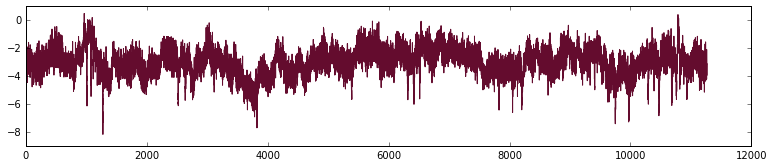

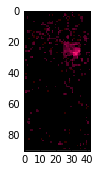

NO
AOTU_R
LOP_L
21
NO
IPS_R
GNG
MB_CA_L
41
NO
PB
ATL_R
ATL_L
80
NO
PB
ATL_R
83
NO
ATL_R
129
NO
AVLP_L
PVLP_L
131
NO
154
NO
ATL_R
157
nodulus


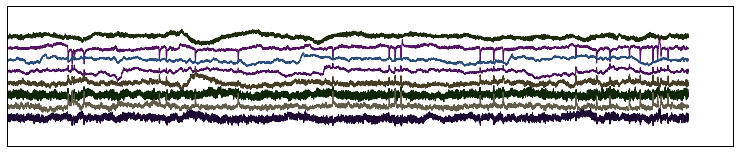

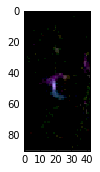

BU_R
162
BU_R
MB_ML_R
AOTU_L
194
bulb


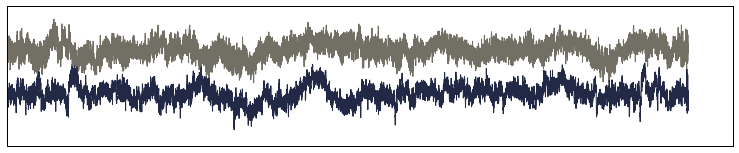

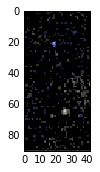

PB
LAL_R
CRE_R
SMP_R
147
protocerebral bridge


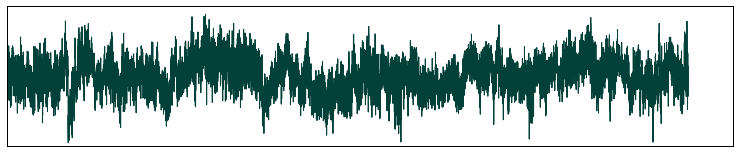

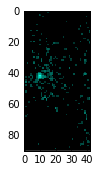

LH_R
25
LH_R
26
LH_R
61
LH_R
62
LH_R
LAL_R
MB_CA_R
73
LH_R
126
lateral horn


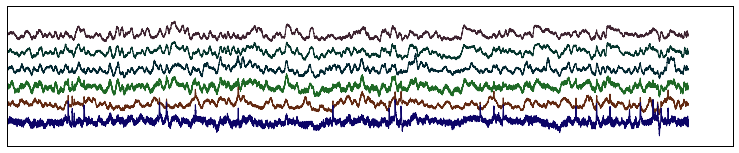

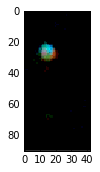

LAL_R
90
LAL_R
109
lateral accessory lobe


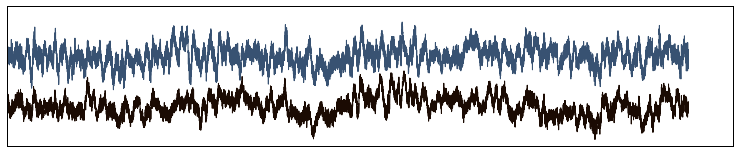

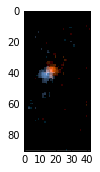

PB
ATL_R
FB
ATL_L
65
antler


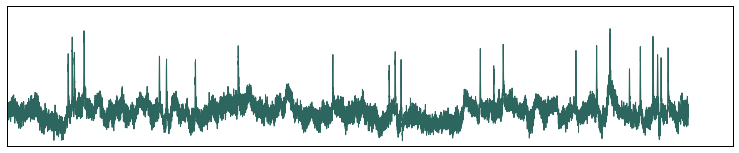

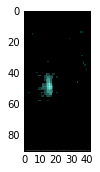

MB_PED_R
74
pedunculus of adult mushroom body


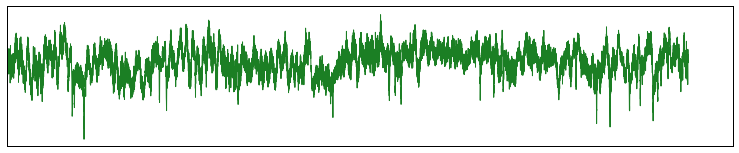

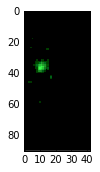

MB_ML_R
MB_ML_L
2
CRE_R
MB_ML_R
MB_ML_L
9
medial lobe of adult mushroom body


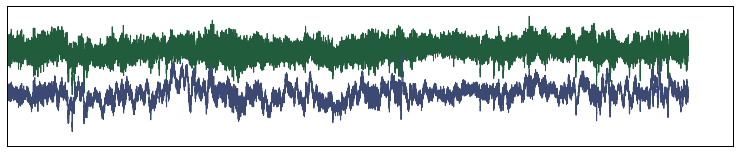

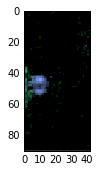

FLA_R
FLA_L
39
flange


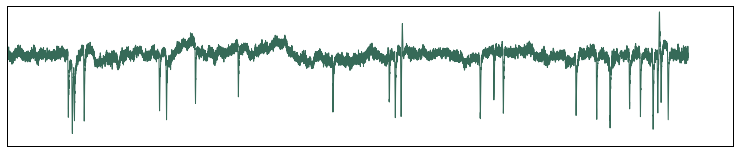

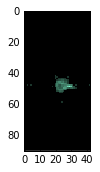

LO_R
LOP_R
60
LOP_R
ME_R
GNG
MB_CA_L
68
LOP_R
ME_R
79
lobula plate


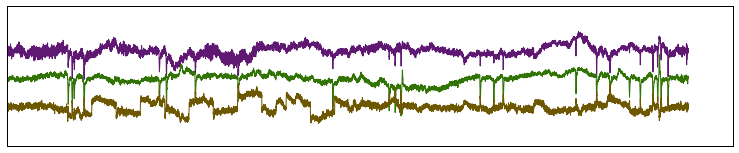

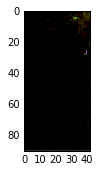

AL_R
MB_PED_L
MB_ML_L
22
AL_R
88
adult antennal lobe


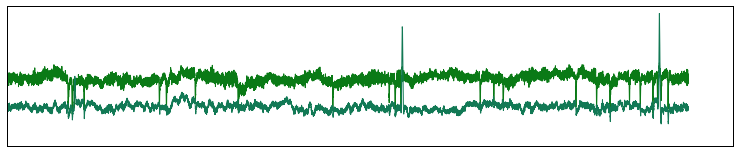

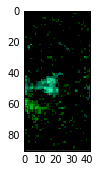

ME_R
13
LO_R
LOP_R
ME_R
42
ME_R
53
ME_R
54
ME_R
55
ME_R
69
ME_R
71
LO_R
ME_R
77
ME_R
92
ME_R
99
ME_R
138
MB_ML_R
ME_R
MB_ML_L
186
medulla


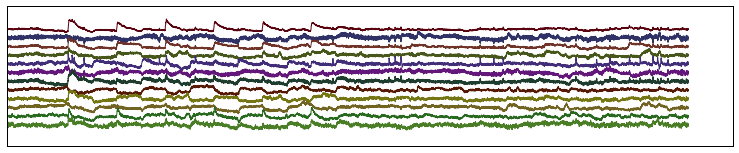

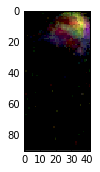

SLP_R
AOTU_R
170
superior lateral protocerebrum


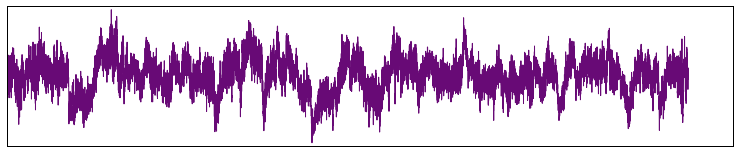

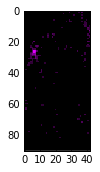

SMP_R
SMP_L
144
SLP_R
SMP_R
163
SMP_R
SMP_L
176
superior medial protocerebrum


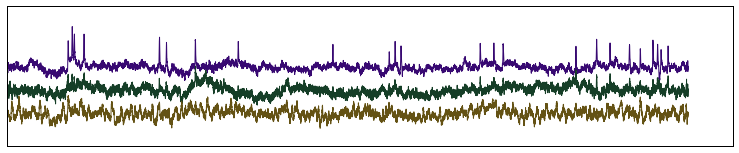

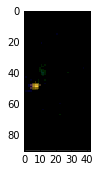

AVLP_R
94
LAL_R
AVLP_R
143
anterior ventrolateral protocerebrum


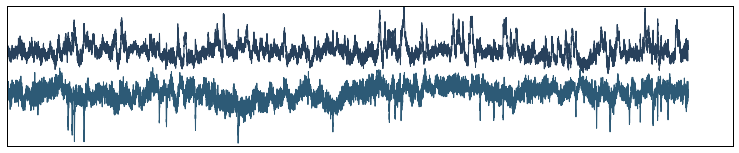

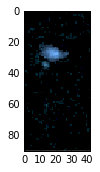

AVLP_R
IVLP_R
128
wedge


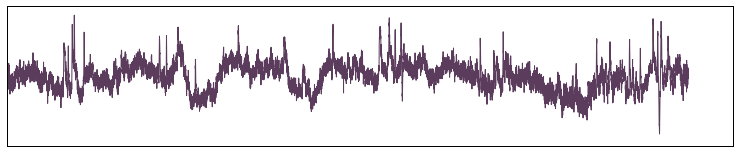

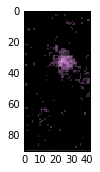

MB_VL_R
AOTU_R
MB_VL_L
16
AOTU_R
57
MB_PED_R
AOTU_R
76
anterior optic tubercle


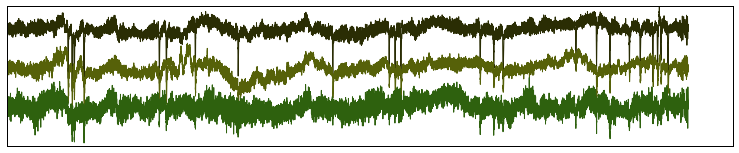

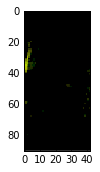

MB_CA_R
6
MB_CA_R
10
MB_CA_R
15
MB_CA_R
32
MB_CA_R
33
MB_CA_R
34
MB_CA_R
67
SLP_R
AOTU_R
MB_CA_R
91
calyx of adult mushroom body


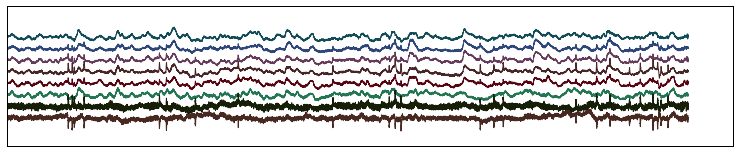

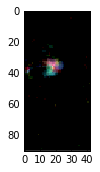

SPS_R
IPS_R
37
LO_R
SPS_R
IPS_R
40
SPS_R
SPS_L
104
superior posterior slope


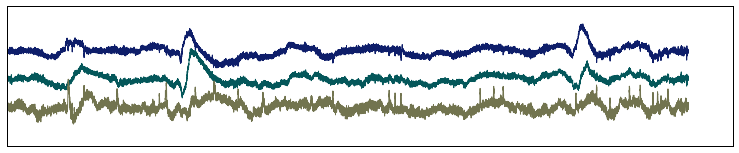

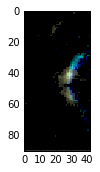

IPS_R
38
IPS_R
GNG
45
inferior posterior slope


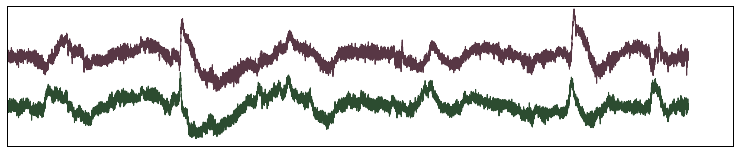

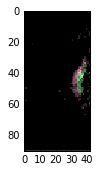

GNG
4
GNG
AOTU_L
20
GNG
AOTU_L
24
SAD
GNG
29
SAD
IPS_R
GNG
44
GNG
47
LOP_R
MB_CA_R
GNG
49
LOP_R
GNG
LOP_L
56
GNG
64
GNG
66
IPS_R
GNG
70
LOP_R
GNG
75
GNG
78
IPS_R
GNG
IPS_L
82
LOP_R
GNG
LO_L
LOP_L
84
MB_CA_R
GNG
LO_L
MB_CA_L
100
GNG
135
GNG
166
adult gnathal ganglion


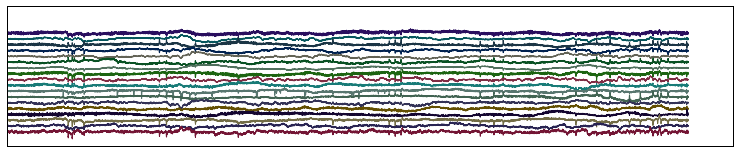

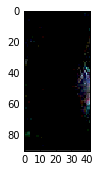

LO_L
ME_L
97
LO_L
112
LO_L
LOP_L
ME_L
121
LO_L
LOP_L
ME_L
123
lobula


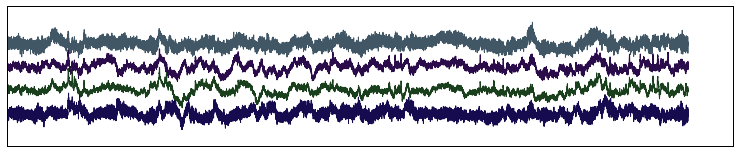

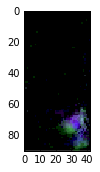

LH_L
14
LH_L
102
LH_L
LAL_L
PLP_L
103
LH_L
111
lateral horn


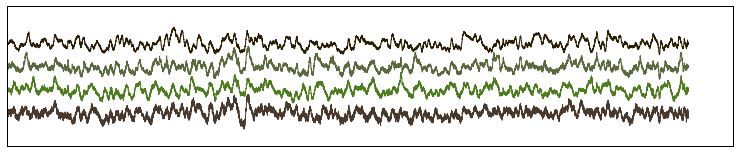

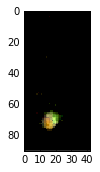

GNG
LAL_L
85
LAL_L
MB_PED_L
89
LAL_L
107
LAL_L
114
lateral accessory lobe


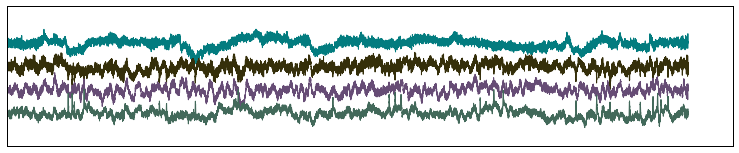

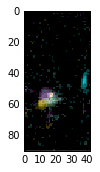

ATL_L
MB_ML_L
113
antler


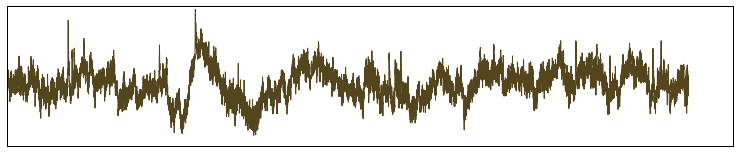

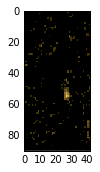

CRE_L
MB_ML_L
SMP_L
72
crepine


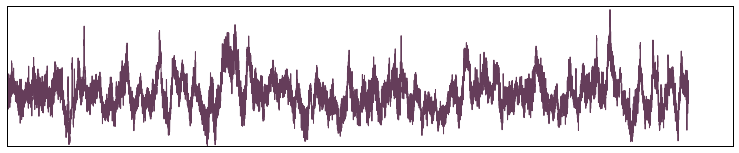

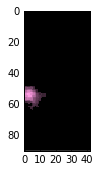

LOP_R
GNG
MB_VL_L
SIP_L
3
MB_VL_L
AOTU_L
5
AOTU_R
MB_VL_L
AOTU_L
36
MB_VL_R
MB_VL_L
48
MB_VL_L
81
vertical lobe of adult mushroom body


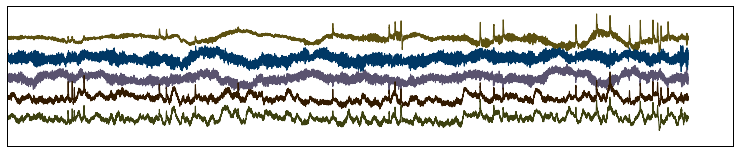

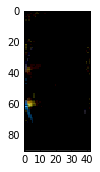

MB_ML_R
CRE_L
MB_ML_L
87
CRE_R
MB_ML_R
EB
MB_ML_L
93
medial lobe of adult mushroom body


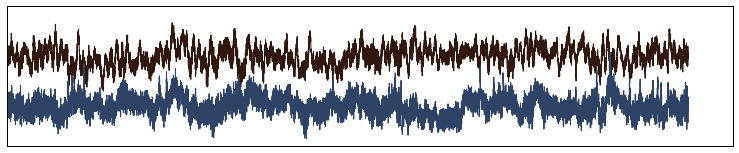

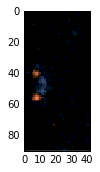

GNG
MB_VL_L
LOP_L
8
GNG
MB_VL_L
LOP_L
46
LOP_R
GNG
LOP_L
63
LOP_L
193
lobula plate


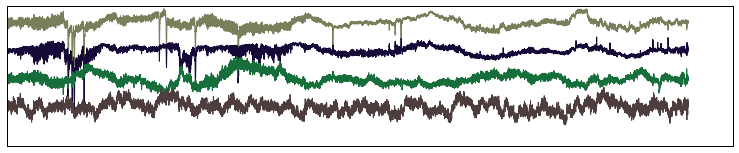

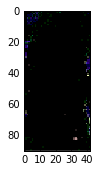

ME_L
7
ME_L
108
LO_L
ME_L
148
ME_L
172
medulla


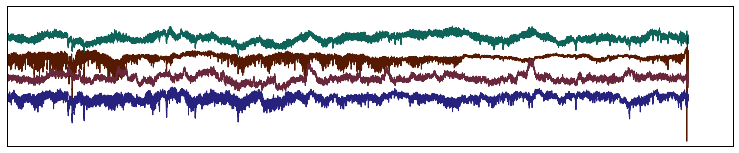

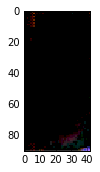

SLP_L
SMP_L
145
SLP_L
158
SLP_L
SMP_L
168
superior lateral protocerebrum


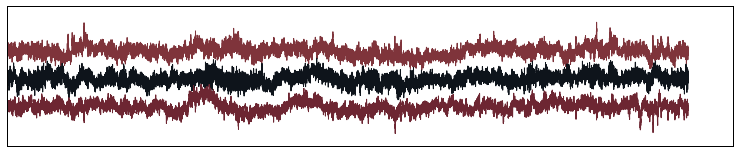

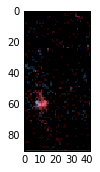

PB
LAL_L
SMP_L
117
superior medial protocerebrum


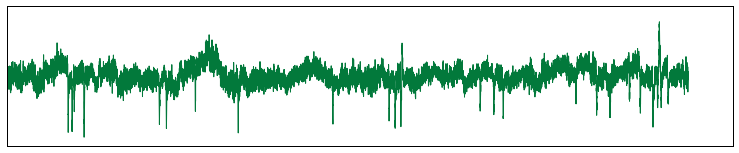

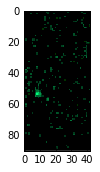

SLP_L
AOTU_L
31
AOTU_R
MB_VL_L
SLP_L
AOTU_L
58
SMP_R
GNG
AOTU_L
101
anterior optic tubercle


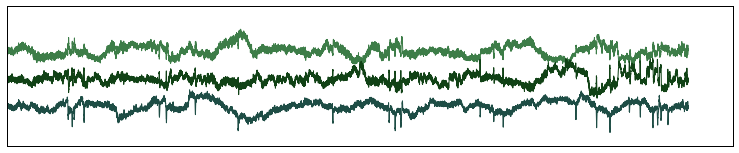

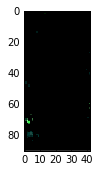

MB_CA_L
11
MB_CA_L
17
MB_CA_L
23
MB_CA_L
28
MB_CA_L
35
MB_CA_L
95
AOTU_R
SLP_L
MB_CA_L
118
MB_CA_L
133
PLP_L
MB_CA_L
134
MB_VL_L
SLP_L
MB_CA_L
SCL_L
136
MB_CA_L
150
calyx of adult mushroom body


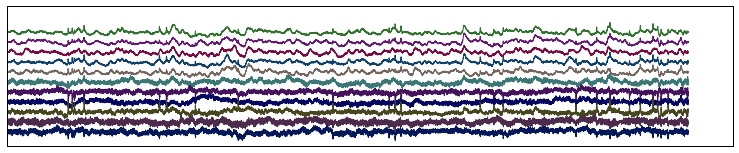

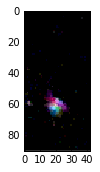

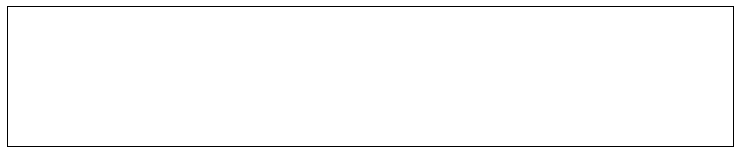

In [17]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


##### Looked at the components maps and time series and remove all the components which are localized on the edge of the brain and with activity unlike GCaMP6 transients.


In [18]:
BadICs=[98,21,41,157,154,162,194,147,126,65,2,39,60,68,79,22,144,143,16,52,37,40,38,45,4,20,24,29,44,47,57,76,49,56,64,66,70,75,78,82,84,100,135,166,85,3,5,36,8,46,63,193,7,108,31,58,101]

In [19]:
for idx in BadICs:
    GoodICAnat[idx] = 0.0

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [20]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  5,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 16, 16, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 23, 24, 24,
       25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 28, 28,
       28, 29, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 34, 34, 34, 34,
       34, 34, 35, 35, 35, 35, 36, 36, 37, 44, 44, 45, 47, 47, 47, 47, 48,
       48, 48, 48, 48, 48, 48, 48, 48, 50, 50, 50, 50, 52, 52, 52, 52, 52,
       53, 53, 53, 53, 53, 58, 60, 61, 61, 61, 62, 62, 62, 64, 64, 69, 69,
       69, 70, 70, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
       74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74])

In [21]:
LargerRegionIndToName = {v: k for k, v in LargerRegionInd.iteritems()}

In [22]:
LargerRegionI

array([12, 12,  5,  5, 12,  5,  5,  1,  1,  5,  5,  5, 12,  1,  6,  5,  2,
        5, 10,  1, 12,  8,  4,  5, 12,  6,  6, 12,  5, 12,  1,  2,  5,  5,
        5,  5,  5,  3,  3, 11,  3,  8,  1, 10, 12,  3,  1, 12,  5, 12,  1,
       12,  5,  1,  1,  1, 12,  2,  2,  8,  1,  6,  6,  1, 12, 10, 12,  5,
        1,  1, 12,  1, 10,  6,  5, 12,  2,  1, 12,  1,  8,  5, 12,  8, 12,
        9,  5,  5,  4,  9,  9,  5,  1,  5,  2,  5, 12,  1,  1,  1, 12,  2,
        6,  6,  3,  5,  2,  9,  1,  9,  5,  6,  1, 10,  9,  1,  8,  7,  5,
        1,  7,  1,  8,  1,  2,  3,  6,  3,  2,  8,  2,  8,  2,  5,  5, 12,
        5, 11,  1,  3,  7,  7,  2,  2,  7,  7, 11,  8,  1, 11,  5,  2,  5,
        2,  8,  3,  7,  8,  7,  5, 11,  5,  8,  7,  8,  1, 12,  2,  7,  7,
        7, 12,  1,  5,  2,  2,  7,  9,  9,  5,  8,  8,  7, 10,  5,  5,  1,
        3,  5,  7,  2,  9,  2,  1,  8,  9,  5,  2])

In [23]:
GoodICAnat

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0

OL
13
42
53
54
55
69
71
77
92
97
99
112
121
123
138
148
172
186


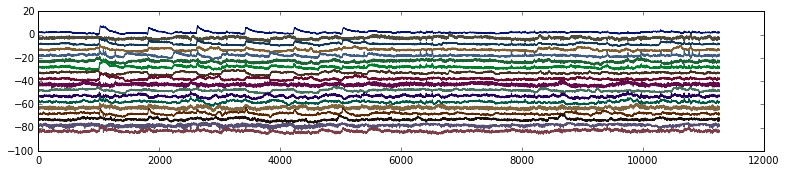

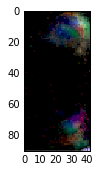

VLNP
94
128


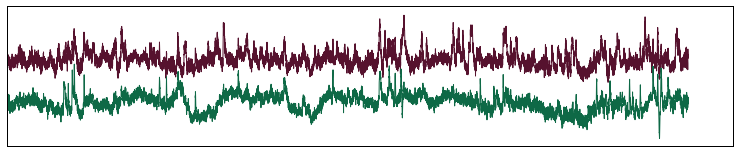

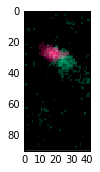

VMNP
104


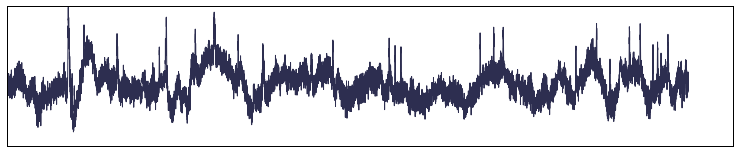

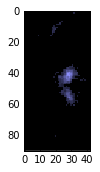

AL
88


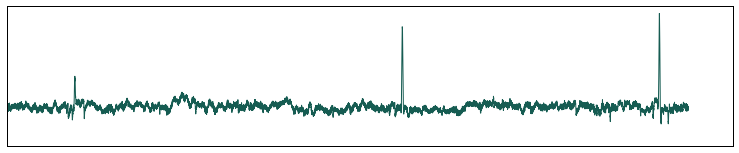

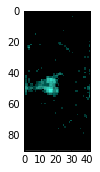

MB
6
9
10
11
15
17
23
28
32
33
34
35
48
67
74
81
87
91
93
95
118
133
134
136
150


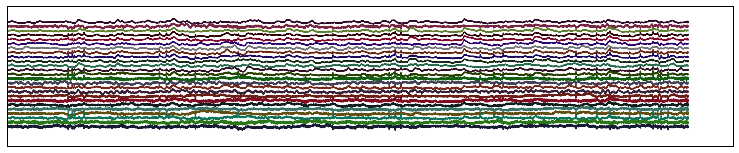

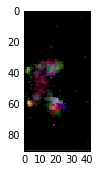

LH
14
25
26
61
62
73
102
103
111


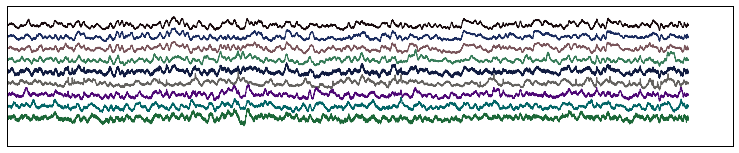

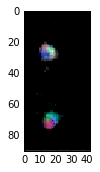

SNP
117
145
158
163
168
170
176


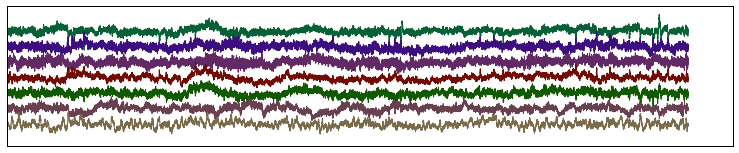

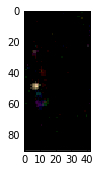

CX
80
83
129
131


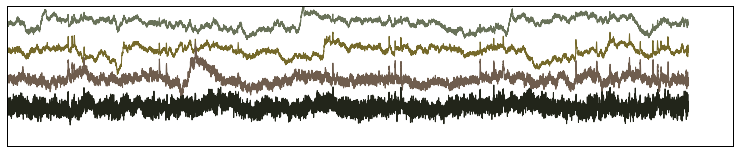

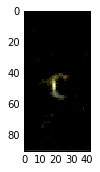

LX
89
90
107
109
114


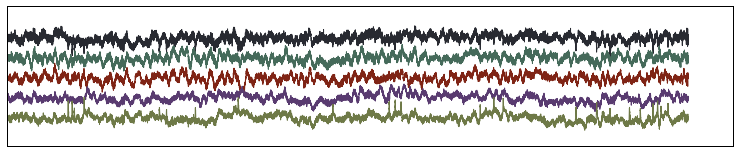

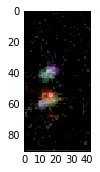

INP
72
113


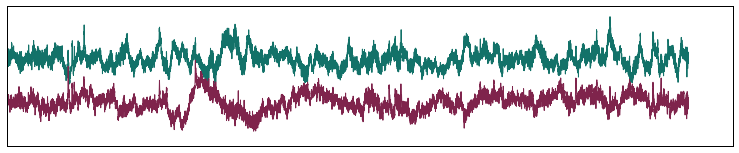

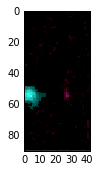

PENP
GNG


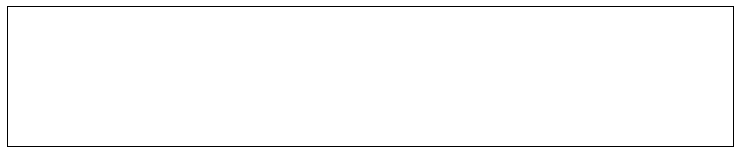

In [24]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
NumberInLargeRegion=np.zeros(13)

for l in range(1,13):
    print(LargerRegionIndToName[l])
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if LargerRegionI[i]==l:          
            if GoodICAnat[i]==1:
                for k in range(3):
                    Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
                Final_maps=Final_maps+Fmap
                #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                tot=tot+1
                print(i)
                n=n+1 
                    
    if n!=0:

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    NumberInLargeRegion[l]=n

In [25]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)
Ua=sio.loadmat(filename)
X=Ua['X']

plt.plot(X.T)

Sx=X.shape

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/ArclightCombo/986/986X.mat


In [43]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/ArclightCombo/986/986Registration/AVandICs986.nii


(90, 43, 37)

In [104]:
AvLightIC=np.zeros(DT.shape[1])        
for j in range(S[3]):
    k=0
    for i in range(Sx[1]):
        if X[0,i]==1:
            AvLightIC[j]=AvLightIC[j]+(np.mean(DT[i:i+200,j])-np.mean(DT[i-200:i,j]))/(2*np.std(DT[i-200:i,j]))
            k=k+1
    AvLightIC[j]=AvLightIC[j]/k

In [105]:
sum(sum(X))

9

In [106]:
k

6

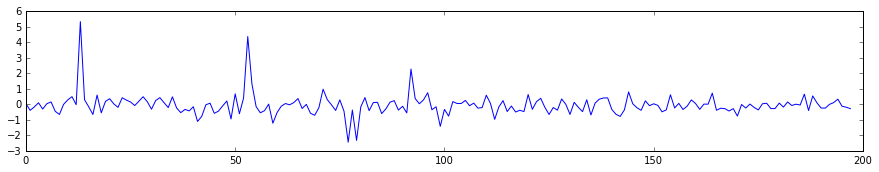

In [107]:
plt.plot(AvLightIC)

In [119]:
AvOdorIC=np.zeros(DT.shape[1])        
for j in range(S[3]):
    k=0
    for i in range(Sx[1]):
        if X[1,i]==1:
            AvOdorIC[j]=AvOdorIC[j]+(np.mean(DT[i:i+200,j])-np.mean(DT[i-200:i,j]))/(2*np.std(DT[i-200:i,j]))
            k=k+1
    AvOdorIC[j]=AvOdorIC[j]/k

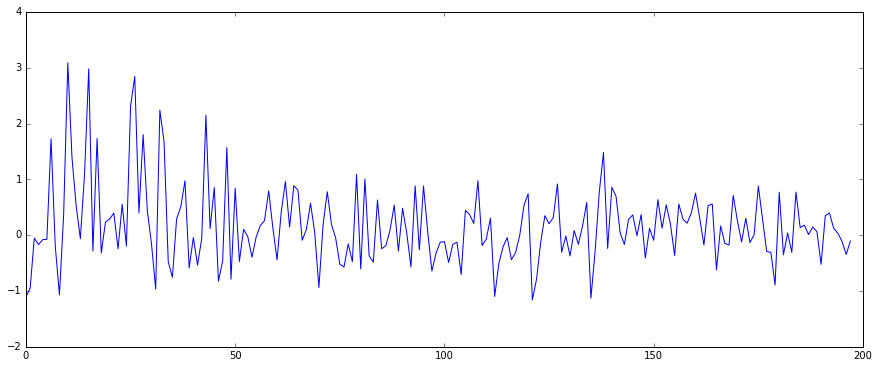

In [120]:
plt.plot(AvOdorIC)

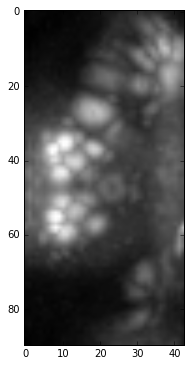

In [121]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

for j in range(S[3]):

    a=''
    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan

plt.imshow(Dmean[:,:,1],cmap=plt.cm.gray)

In [122]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
pylab.rcParams['figure.figsize'] = (15, 2.5)

In [123]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [124]:
C=np.zeros((S[3],3))
i=0
l=0

LightNuminRegion=np.zeros(12)
for j in range(S[3]):  
    if AvLightIC[j]>1:
        #C[j,:]=C1[i%6][:]
        C[j,2]=1
        C[j,1]=1
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.5*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas[0,j]=0
        #print(Indexo[j])
        print(j+1)
        print(CompMainName[j])     
        
        i=i+1
        l=l+1

        #if l==2:
            #break
    

14
ME_R
54
ME_R
55
ME_R
93
ME_R


In [125]:
C=np.zeros((S[3],3))
i=0
l=0

OdorNuminRegion=np.zeros(12)
for j in range(S[3]):  
    if AvOdorIC[j]>1:
        #C[j,:]=C1[i%6][:]
        C[j,0]=1
        C[j,1]=0
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.5*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas[0,j]=0
        #print(Indexo[j])
        print(j+1)
        print(CompMainName[j])     
        
        i=i+1
        l=l+1

        #if l==2:
            #break
    

7
MB_CA_R
11
MB_CA_R
12
MB_CA_L
15
LH_L
16
MB_CA_R
18
MB_CA_L
26
LH_R
27
LH_R
29
MB_CA_L
33
MB_CA_R
34
MB_CA_R
44
CRE_R
49
MB_VL_L
80
LOP_R
82
MB_VL_L
139
ME_R


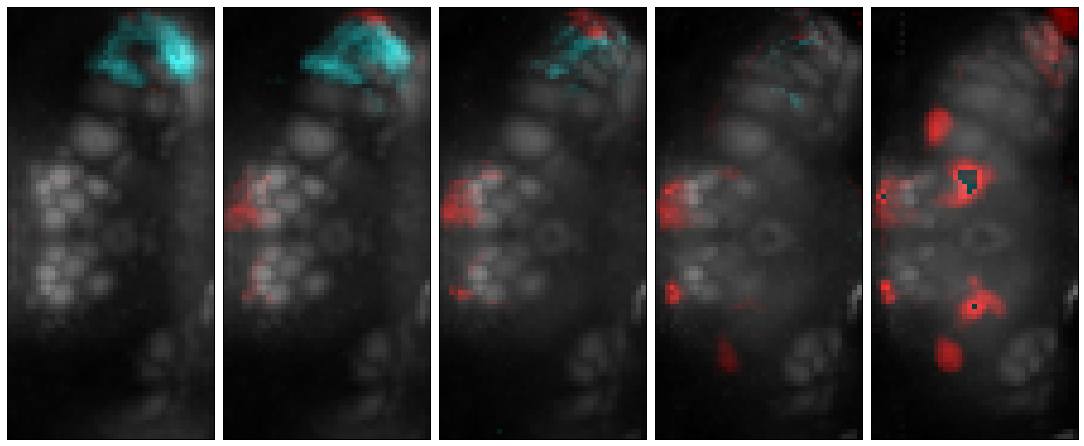

In [126]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/500
    #Df=Df/(np.max(np.max(np.max(Df),3)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

In [33]:
# Output number of component per region
np.savetxt('/'.join(filename.split('/')[:-1])+'/NumberInLargeRegions.txt',NumberInLargeRegion)